# Project: Medicare Cost Prediction 

* Data import
* Understanding the data
* Exploratory Data Analysis
* Modeling

## Data Import

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('medicarecharges.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Understand the data

* __Age__: Insurance contractor age, years
* __Sex__: Insurance contractor gender, [female, male]
* __BMI__: Body mass index, providing and understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9
* __Children__: Number of children covered by health insurance/number of dependencies
* __Smoker__: Smoking, [yes, no]
* __Region__: the beneficiary's residential area in the US, [northeast, southeast, southwest, northest]
* __Charges__: Individual medical costs billed by health insurance, $ _predicted value_

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


## Exploratory Data Analysis

#### 1) Distribution of the target: charges

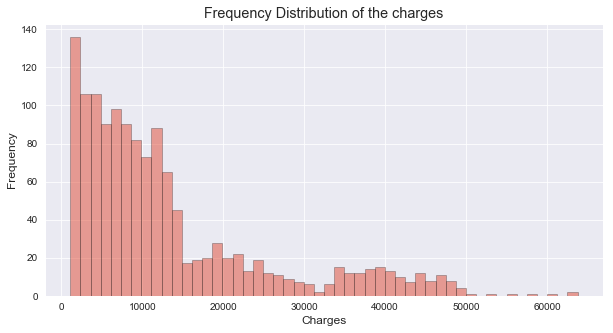

In [7]:
f= plt.figure(figsize=(10,5))
plt.hist(df.charges,bins = 50,alpha=0.5,histtype='bar',ec='black')
plt.title("Frequency Distribution of the charges")
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

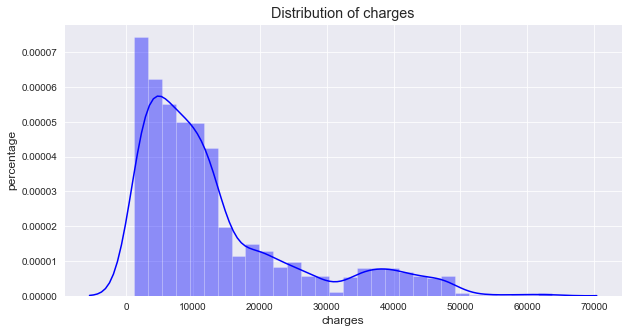

In [8]:
f= plt.figure(figsize=(10,5))
sns.distplot(df['charges'],color='b')
plt.title('Distribution of charges')
plt.xlabel('charges')
plt.ylabel('percentage')
plt.show()

#### 2) Correlation of variables

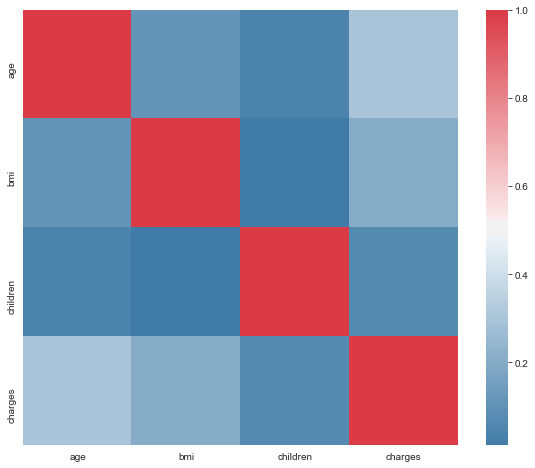

In [9]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)
plt.show()

#### 3) Correlation between age and charges

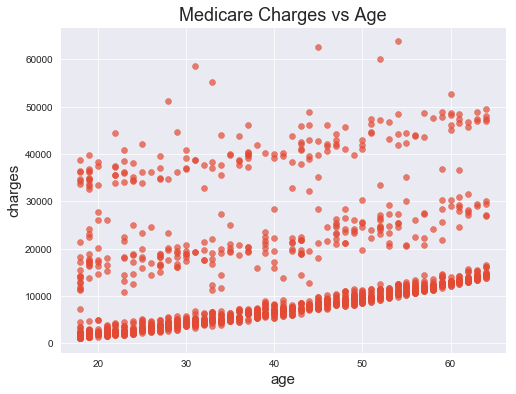

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(df.age, df.charges, alpha=0.7)
plt.xlabel('age', fontsize=15)
plt.ylabel('charges', fontsize=15)
plt.title('Medicare Charges vs Age', fontsize=18)
plt.show()

<Figure size 576x432 with 0 Axes>

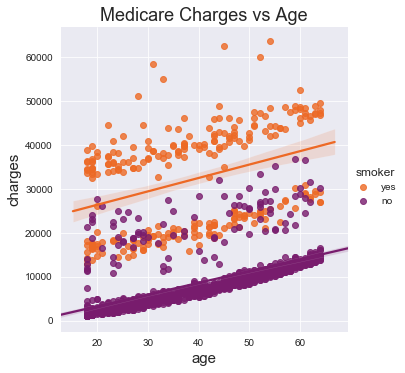

In [11]:
plt.figure(figsize=(8,6))
sns.lmplot(x='age',y='charges',hue='smoker',data=df, palette='inferno_r') # choose palette
plt.xlabel('age', fontsize=15)
plt.ylabel('charges', fontsize=15)
plt.title('Medicare Charges vs Age', fontsize=18)
plt.show()

#### 4) Correlation between bmi and charges

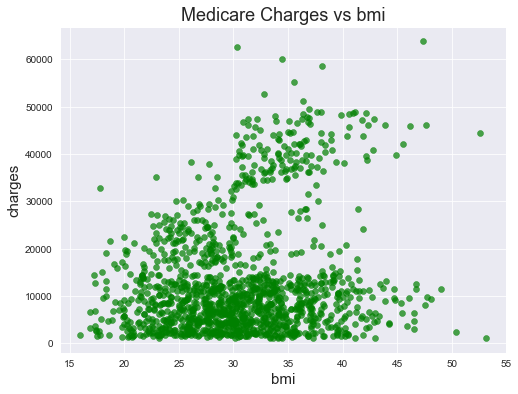

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(df.bmi, df.charges, alpha=0.7, color='green')
plt.xlabel('bmi', fontsize=15)
plt.ylabel('charges', fontsize=15)
plt.title('Medicare Charges vs bmi', fontsize=18)
plt.show()

<Figure size 864x432 with 0 Axes>

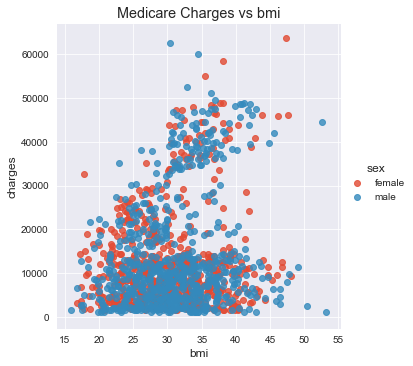

In [13]:
plt.figure(figsize=(12,6))
sns.lmplot('bmi','charges',data=df, hue='sex', fit_reg=False)
plt.title("Medicare Charges vs bmi")
plt.show()

#### 5) Correlation between smoker and charges

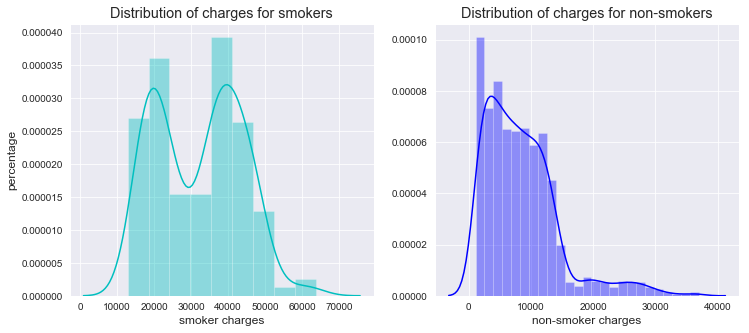

In [14]:
# Smoking people spend more on treatment
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 'yes')]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')
ax.set_xlabel('smoker charges')
ax.set_ylabel('percentage')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 'no')]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')
ax.set_xlabel('non-smoker charges')
plt.show()

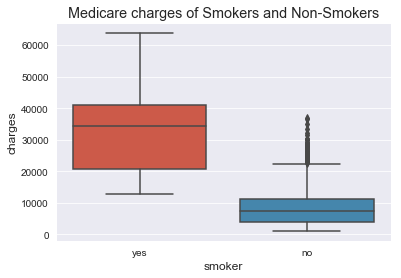

In [15]:
sns.boxplot(x=df.smoker,y=df.charges,data=df)
plt.title("Medicare charges of Smokers and Non-Smokers")
plt.show()
# those who smoke spend around 4 times more on medicines or treatment as comparerd to those who don't smoke

#### 6) Correlation between smoking, gender and the number of people

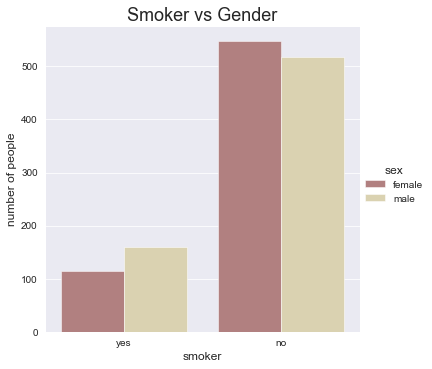

In [16]:
# the number of non-smoking patients is greater
# male tend to smoke
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=df) 
# show the relationship between a numerical and one or more categorical variables
plt.title('Smoker vs Gender', fontsize=18)
plt.ylabel('number of people')
plt.show()

#### 7) Correlation between smoking, gender and charges

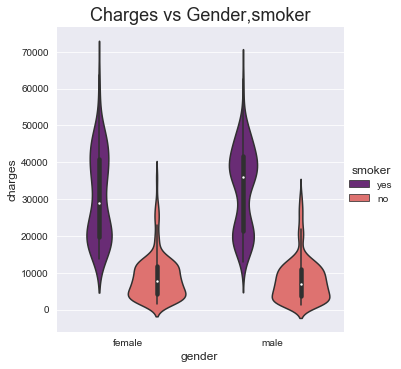

In [17]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=df, palette = 'magma')
plt.title('Charges vs Gender,smoker', fontsize=18)
plt.xlabel('gender')
plt.show()

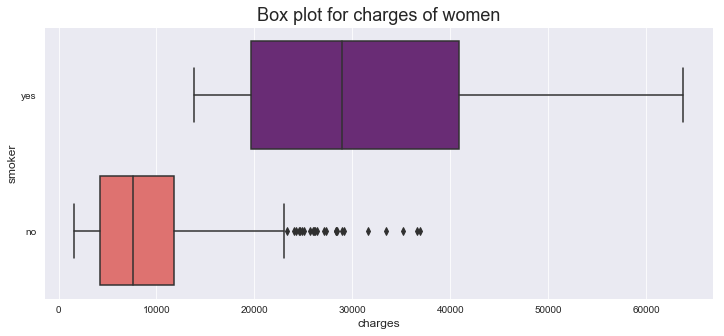

In [18]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women", fontsize=18)
sns.boxplot(y="smoker", x="charges", data = df[(df.sex == 'female')] , orient="h", palette = 'magma')
plt.show()

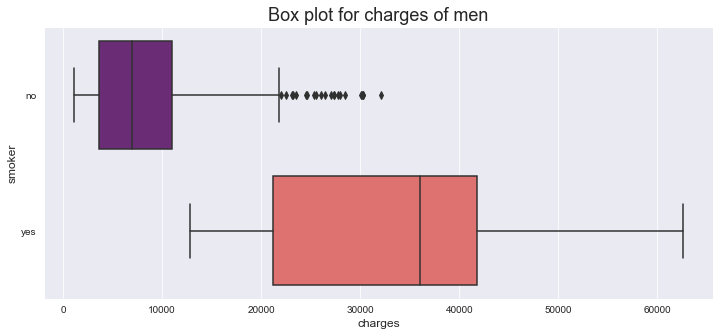

In [19]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men", fontsize=18)
sns.boxplot(y="smoker", x="charges", data = df[(df.sex == 'male')] , orient="h", palette = 'magma')
plt.show()

#### 8) Correlation between region and charges

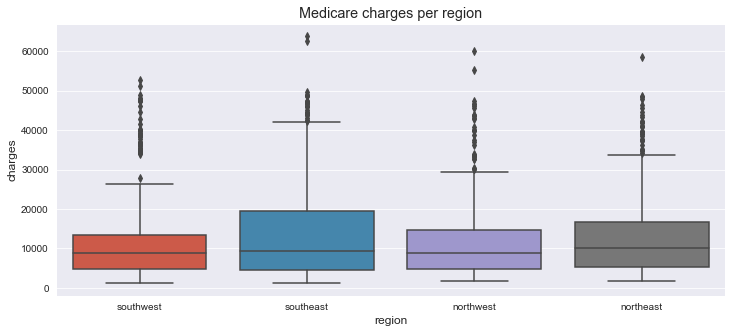

In [20]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df.region,y=df.charges,data=df)
plt.title("Medicare charges per region")
plt.show()

## Modeling

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

### Preparation and splitting the data

In [22]:
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)
df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
regions = pd.get_dummies(df['region'])
df = pd.concat([df.drop('region', axis=1), regions], axis=1)

#### 1) Linear Regression

In [23]:
x = df.drop(['charges'], axis = 1)
y = df.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7958786376014413


#### 2) Polynomial Regression

In [24]:
# y = Y=θo + θ₁X + θ₂X² + … + residual error
X = df.drop(['charges'], axis = 1)
Y = df.charges

quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8768054583276584


#### 3) Random Forest

In [25]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 3685168.754, MSE test data: 19671574.162
R2 train data: 0.974, R2 test data: 0.875
